<a href="https://colab.research.google.com/github/bozhikov/SHE/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22SHE_spectra_tools2022_by__sektor3__ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** ***SPECTRA DATA***# Новый раздел

---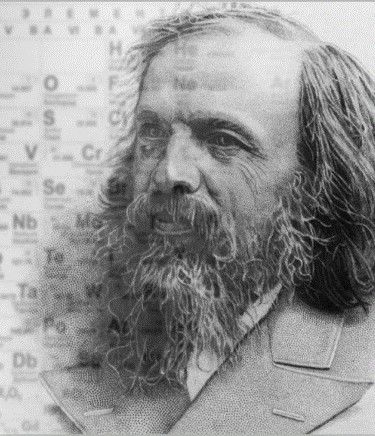



---



In [9]:
#loading binary spectrometric file
#write the path/content/sample_data/OCT144SM29.000
path='/content/JN24SMAR01.003'
#open downloaded file using path
ab=open(path,'rb')
#read the current downloaded document
abv=ab.read()
#lenght of the read and downloaded file
len(abv)


7668120

In [ ]:
abv[24]

1

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#block of splitting binary file into the patterns in accordance with Celnokov protocol
class input_file:
  #accesible attributes
  ID,Time,TTime,TTTime,TTTTime,F,A,FF,AA,FFF,AAA,FFFF,AAAA,Time_tot,Ftot,Atot=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
  #methods of initiliziation
  def  __init__(self,Currid_1byte,Time_hbyte,Time_lbyte,F_hbyte,F_lbyte,A_hbyte,A_lbyte):

       self.Currid=Currid_1byte
       self.ID.append(Currid_1byte)
       self.Time_hbyte=Time_hbyte
       self.Time.append(Time_hbyte)
       self.Time_lbyte=Time_lbyte
       self.Time.append(Time_lbyte)
       self.F_hbyte=F_hbyte
       self.F.append(F_hbyte)
       self.F_lbyte=F_lbyte
       self.F.append(F_lbyte)
       self.A_hbyte=A_hbyte
       self.A.append(A_hbyte)
       self.A_lbyte=A_lbyte
       self.A.append(A_lbyte)
   #convert from decimal to binary:
  def data_bin(self):
     for F in self.F:
       self.FF.append(bin(F))
     for A in self.A:
       self.AA.append(bin(A))
     for Time in self.Time:
       self.TTime.append(bin(Time))
 #convert from binary to string in order to stick data in position of time, fission, alpha items
  def convertor(self):
    import string
    for i in range(len(self.FF)):
      self.FFF.append(str(self.FF[i]).lstrip('0b'))
    for j in range(len(self.AA)):
      self.AAA.append(str(self.AA[j]).lstrip('0b'))
    for k in range(len(self.TTime)):
      self.TTTime.append(str(self.TTime[k]).lstrip('0b'))
    for FFF in self.FFF:
      self.FFFF.append(FFF.zfill(8))
    for AAA in self.AAA:
      self.AAAA.append(AAA.zfill(8))
    for TTTime in self.TTTime:
      self.TTTTime.append(TTTime.zfill(8))
  #return to binary
  def total_join_data(self):
    for l in range(0,len(self.FFFF)-1,2):
      self.Ftot.append(self.FFFF[l]+self.FFFF[l+1])
    for m in range(0,len(self.AAAA)-1,2):
      self.Atot.append(self.AAAA[m]+self.AAAA[m+1])
    for n in range(0,len(self.TTTTime)-1,2):
      self.Time_tot.append(self.TTTTime[n]+self.TTTTime[n+1])

In [10]:
#loading opened input binary file into this class look at Protocol
for i in range(0,(len(abv)),8):
  s=input_file(abv[i],abv[i+3],abv[i+2],abv[i+5],abv[i+4],abv[i+7],abv[i+6])

In [ ]:
len(s.ID)

104711

In [11]:
#call method data_bin
s.data_bin()

In [12]:
#call method convertor
s.convertor()

In [13]:
#call method join_data
s.total_join_data()

In [25]:
s.ID,s.Time,s.TTime,s.TTTime,s.TTTTime,s.F,s.A,s.FF,s.AA,s.FFF,s.AAA,s.FFFF,s.AAAA,s.Time_tot,s.Ftot,s.Atot=0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
s.ID[40:60]

[10, 1, 1, 10, 10, 2, 6, 10, 5, 10, 10, 5, 5, 1, 10, 10, 10, 10, 1, 5]

In [14]:
#spliting into the final items:number of strip, time, energy of alpha and fission
class Spectroscopy_Data():
  ID_,Time_,N_Strip,E_Fis,E_alfa,Time_abs,ID_beam,beam,number_counter,ID_corr,E_alfa_corr,Time_abs_corr,beam_time,Time_E_corr=[],[],[],[],[],[],[],[],[],[],[],[],[],[]

  def __init__(self,ID,Time,Ftot,Atot):


      self.ID=ID
      self.ID_.append(ID)
      self.Time=Time
      value_time=int(Time,2)
      self.Time_.append(value_time)
      self.Ftot=Ftot
      value1_Ftot=int(Ftot[0:4],2)
      value2_Ftot=int(Ftot[5:16],2)
      self.N_Strip.append(value1_Ftot)
      self.E_Fis.append(value2_Ftot)
      self.Atot=Atot
      value1_E_alfa=int(Atot[4:16],2)   #replaced 5 by 4
      value2_E_alfa=int(Atot[7:16],2)
      self.E_alfa.append(value1_E_alfa)
      self.ID_beam.append(value2_E_alfa)

      #global time
  def Time_setings(self):
       w=0
       c=-1
       for ID_ in self.ID_:
            c=c+1
            if (ID_ ==10):
              w=w+1
              value_temtime= self.Time_[c]+w*65536
              self.Time_abs.append(value_temtime)

            else:
                self.Time_abs.append(self.Time_[c]+w*65536)
      #call beam status
  def beam_status(self):

        beam_count=-1
        for ID_ in self.ID_:
          beam_count=beam_count+1
          if ( ID_==9):
             self.beam.append(self.ID_beam[beam_count])
             self.beam_time.append(self.Time_abs[beam_count])
       #choice of certain ID
  def Data_final_corr(self):
         b=-1

         for ID_ in self.ID_:
            b=b+1
            if (ID_==1):            # or (ID_==5): # or (ID_==5): # СМОТРИМ ПРОТОКОЛ
              self.ID_corr.append(self.ID_[b])
              self.Time_abs_corr.append(self.Time_abs[b])
              self.E_alfa_corr.append(self.E_alfa[b])

      #choice of energy range
  def flow_energy_selection(self,ch_1,ch_2):
        self.ch_1=ch_1
        self.ch_2=ch_2
        cc=-1
        for E_alfa_corr in range(len(self.E_alfa_corr)):
         cc=cc+1
         if (self.E_alfa_corr[cc]>=ch_1) and (self.E_alfa_corr[cc]<=ch_2) and (self.N_Strip[cc]==0):#data for certain strip
          self.number_counter.append(1)
          self.Time_E_corr.append(self.Time_abs_corr[cc])



In [15]:
#loading objects of Input_file class into Spectroscopy_Data class, creating object with name 'zy'
for q in range(0,len(s.ID),1):
   zy=Spectroscopy_Data(s.ID[q],s.Time_tot[q],s.Ftot[q],s.Atot[q])

In [60]:
#clean accesible attributes of input_file class (recommended before new initilization)
zy.ID_,zy.Time_,zy.N_Strip,zy.E_Fis,zy.E_alfa,zy.Time_abs,zy.ID_beam,zy.beam,zy.Time_E_corr,zy.number_counter,zy.ID_corr,zy.E_alfa_corr,zy.Time_abs_corr=0,0,0,0,0,0,0,0,0,0,0,0,0

In [16]:
#call global time
zy.Time_setings()

In [17]:
table_beam=pd.DataFrame(zy.beam,columns=['beam_lable'])
table_time=pd.DataFrame(zy.beam_time,columns=['beam_time'])
table_beam_time=table_beam.join(table_time)
table_beam_time.head()

,beam_lable,beam_time


In [ ]:
len(table_beam_time)

304

Spectre reconstruction

In [18]:
#данные берем из объекта zy
data_G1SMAR55Time=pd.DataFrame(zy.Time_abs, columns=['Time'])
data_G1SMAR55ID=pd.DataFrame(zy.ID_, columns=['ID'])
data_G1SMAR55Ealfa=pd.DataFrame(zy.E_alfa, columns=['E_a'])
data_G1SMAR55Strip=pd.DataFrame(zy.N_Strip, columns=['N_'])
Time_ID=data_G1SMAR55Time.join(data_G1SMAR55ID)
Time_ID_E_a=Time_ID.join(data_G1SMAR55Ealfa)
Time_ID_E_a_Strip=Time_ID_E_a.join(data_G1SMAR55Strip)
Time_ID_E_a_Strip.head()

,Time,ID,E_a,N_
0,48394,5,1680,5
1,1425,1,1973,4
2,17722,1,1977,0
3,18685,5,1763,1
4,20122,1,1564,2


In [ ]:
len(Time_ID_E_a_Strip)

348069

<Axes: >

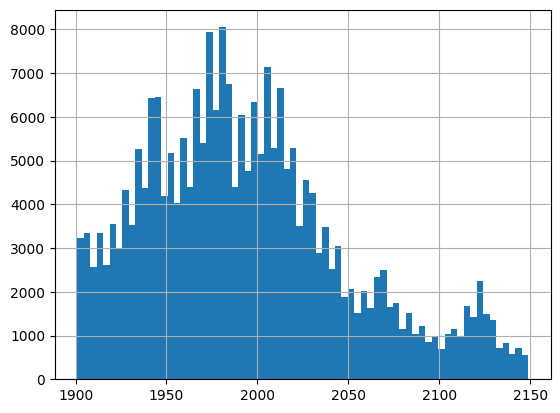

In [23]:
strip=Time_ID_E_a_Strip[(Time_ID_E_a_Strip['N_']==0) & ( Time_ID_E_a_Strip['ID']==1) ]
strip_zoom= strip[( strip['E_a']>1900) & ( strip['E_a']<2150)]
strip_zoom['E_a'].hist(bins=70)
#strip['E_a'].hist(bins=10)

<Axes: >

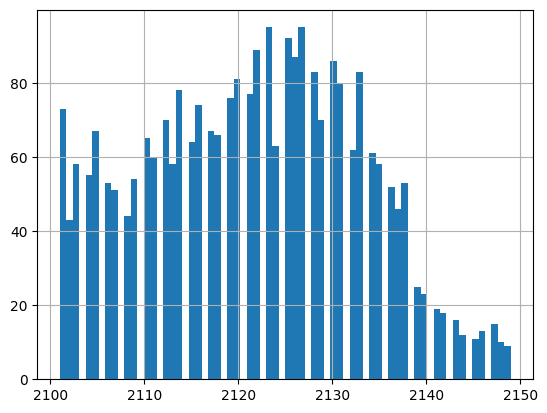

In [31]:
strip_zoom_Hg179= strip[( strip['E_a']>2100) & ( strip['E_a']<2150)]
strip_zoom_Hg179['E_a'].hist(bins=70)

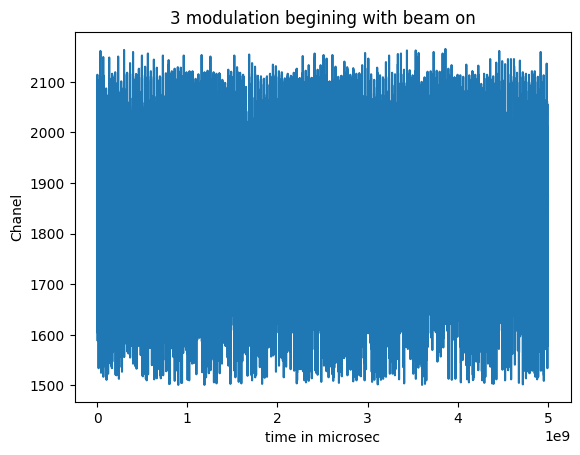

In [ ]:
plt.plot(strip_zoom['Time'],strip_zoom['E_a'])
#plt.axis([1642547,1e7,1735,1745])
#plt.axis([1642547,2e8,1760,1770])
plt.xlabel('time in microsec')
plt.ylabel('Chanel')
plt.title('3 modulation begining with beam on')
#plt.vlines([3.3e7,6.6e7,9.9e7], 1700,1800, colors='red')
mark_beam_off_t=pd.DataFrame(zy.beam_time,columns=['time'])
mark_beam_off_s=pd.DataFrame(zy.beam,columns=['status'])
mark_beam_off=mark_beam_off_s.join(mark_beam_off_t)
marker=mark_beam_off[mark_beam_off['status']==256]
plt.vlines(marker, 1700,1800, colors='red')
#plt.savefig('modulation')

In [41]:
mark_beam_off_t=pd.DataFrame(zy.beam_time,columns=['time'])
mark_beam_off_s=pd.DataFrame(zy.beam,columns=['status'])
mark_beam_off=mark_beam_off_s.join(mark_beam_off_t)
marker=mark_beam_off[mark_beam_off['status']==1]



In [42]:
mark_beam_off

,status,time
0,256,19492813
1,1,29492880
2,256,59493080
3,1,69493146
4,256,99493346
...,...,...
245,1,4909459853
246,256,4939460052
247,1,4949460118
248,256,4979460318


In [ ]:
strip.head()

,Time,ID,E_a,N_
12,334706,5,1849,0
16,424588,5,1882,0
25,608588,5,1766,0
37,879357,5,436,0
47,1180233,5,1911,0


In [ ]:
len(zy.beam)

304

<Axes: >

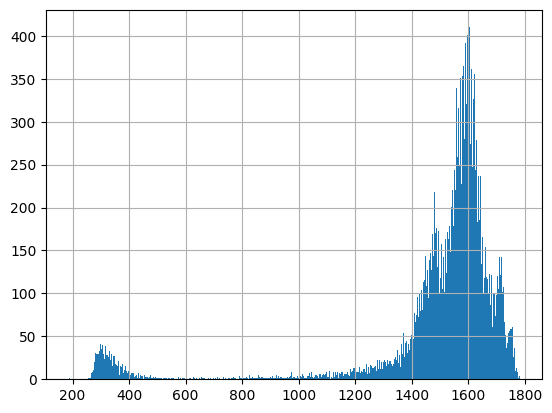

In [ ]:
strip['E_a'].hist(bins=450)

In [ ]:
strip_zoom.sum()

Time    11523029451234
ID               22845
E_a            7964260
N_                9138
dtype: int64

In [ ]:
len(strip_zoom[strip_zoom['E_a']>2020])

3937

**Break up into the strips**

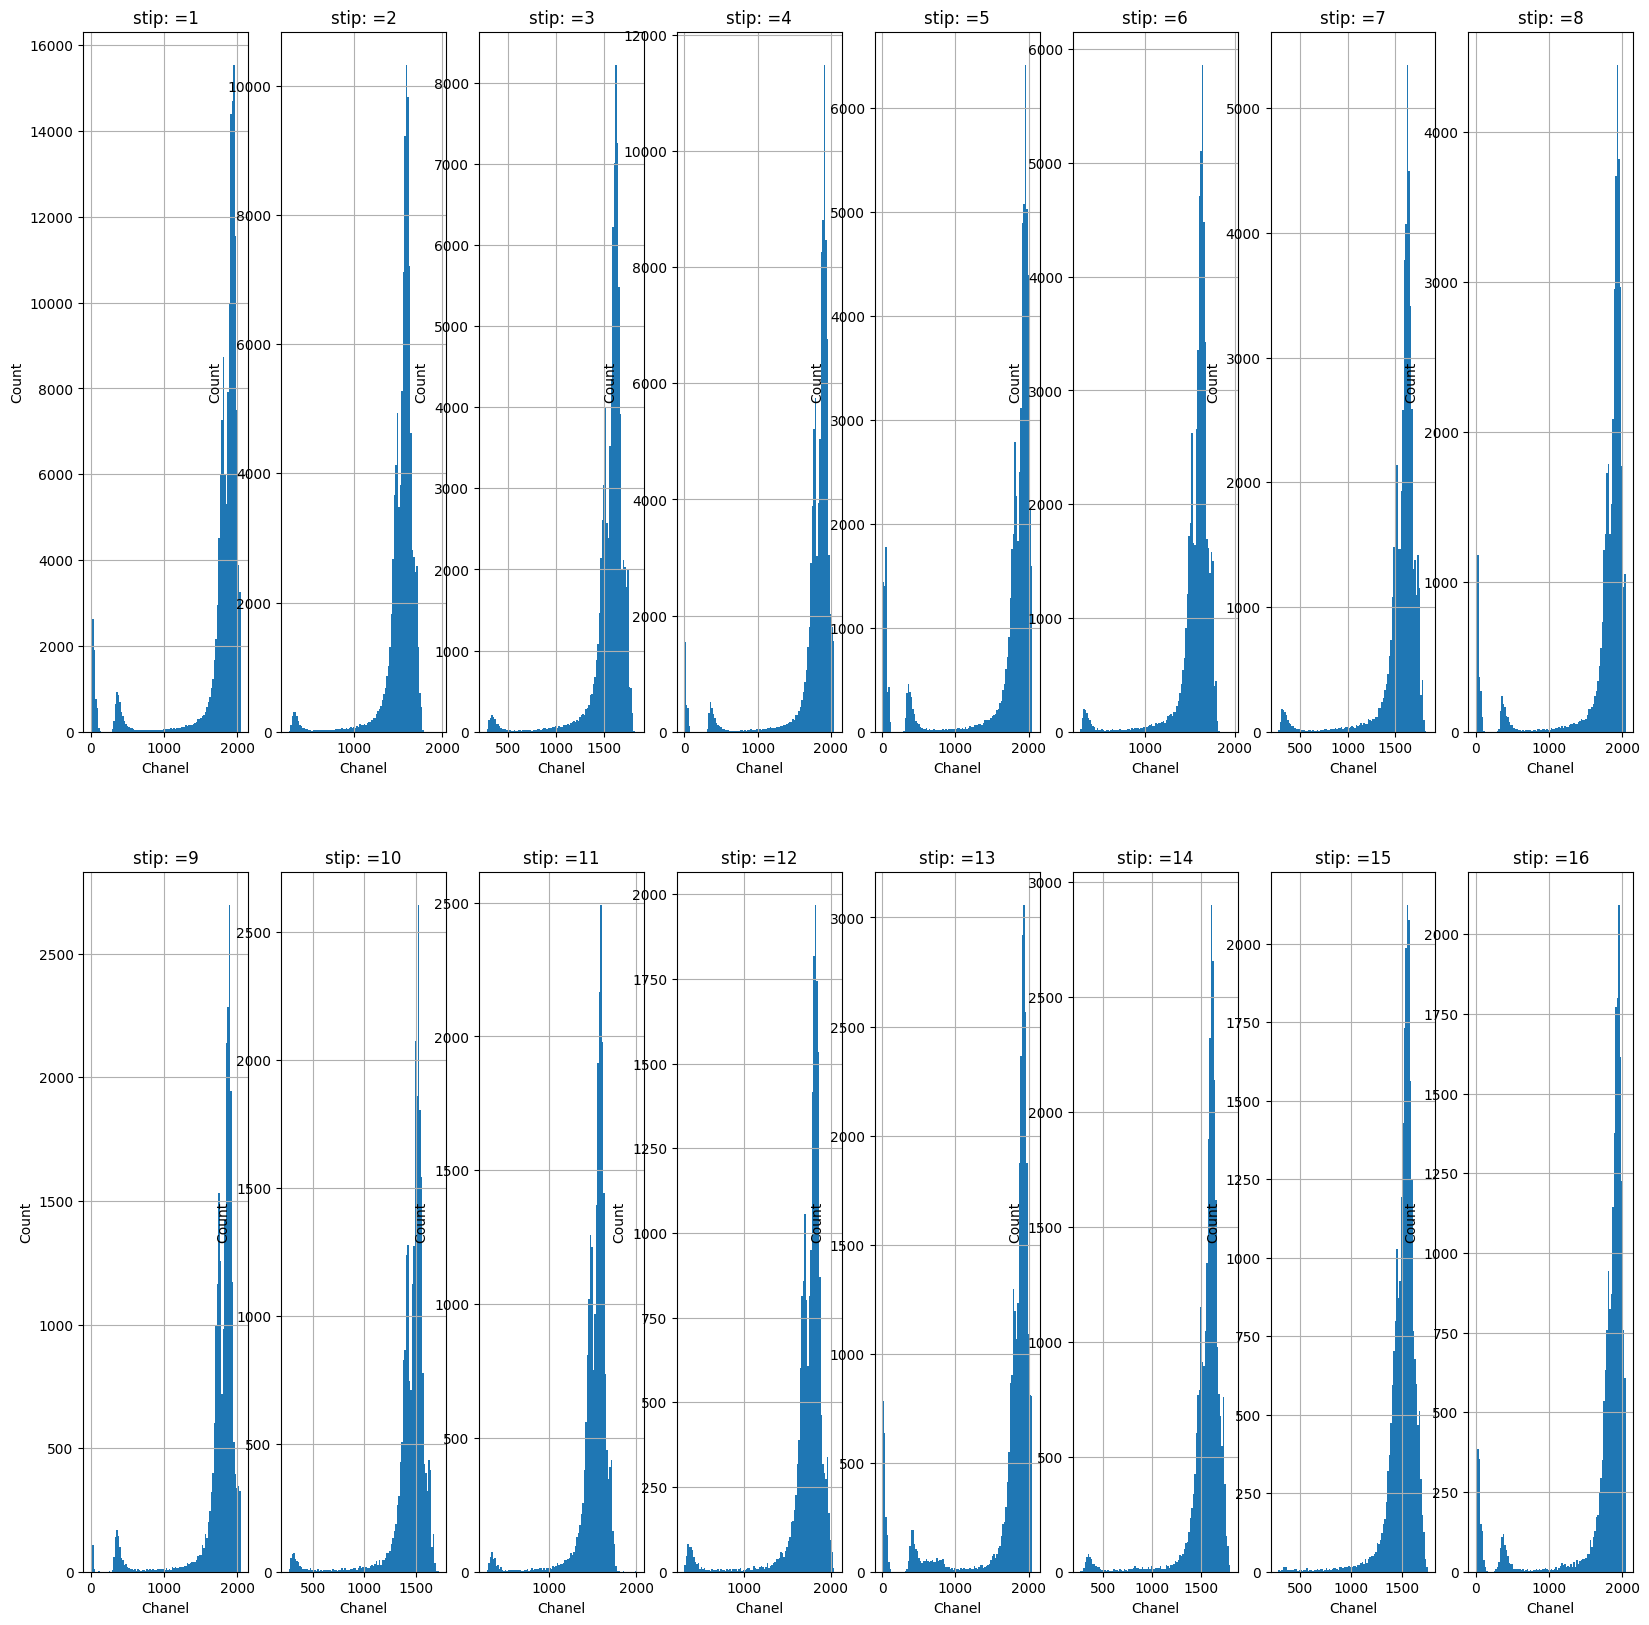

In [ ]:
det_bottom=plt.figure(figsize=(20,20))
z=0
for i in range(16):
  plt.subplot(2,8,i+1)
  plt.xlabel('Chanel')
  plt.ylabel('Count')
  plt.title('stip: =%i' %(i+1))
  strip=Time_ID_E_a_Strip[(Time_ID_E_a_Strip['N_']==i) & ( Time_ID_E_a_Strip['ID']==1) ]# смотри протокол файлов для выбора top(ID=1,для файл OCT144SM23.000) and bottom(ID=5,OCT144SM23.000)
  #strip['E_a'].hist(bins=1000)
  #strip_zoom= strip[( strip['E_a']>1770) & ( strip['E_a']<2000)]
  #strip_zoom['E_a'].hist(bins=100)
  strip['E_a'].hist(bins=100)    #,range=(700,1000))
  #plt.savefig('hG') СОХРАНИТЬ ФИГУРУ

In [17]:
#call beam status
zy.beam_status()

In [18]:
#call to show certain ID
zy.Data_final_corr()

In [19]:
#call to fine counts in certain energy range 'example' self.flow_energy_selection(left border channel,right border channel)
zy.flow_energy_selection(2110,2140)

In [20]:
#dealing with Spectroscopy_Data class specially for counting alpha in chosen above energy range
class data_tools():
  #list of output tupple attributes
  number_time,Beam_Time,list_counter,bb=[],[],[],[]

  #input number of alpha counts (as one digit)in chosen energy range in respective time
  def __init__(self,*number_counter):

    self.number_counter=number_counter
    self.number_time.append(number_counter)
    #self.Time_of_E_corr=Time_of_E_corr

  #time filter (time interval begins after beam on/off )
  def flow_time_determination_1(self,delta_t):
    self.delta_t=delta_t

  #input data for beam status
  def flow_time_determination_2(self,*beam):
    self.beam=beam
    self.Beam_Time.append(beam)

    for b in range(len(self.Beam_Time[0][0])):

      self.bb.append(b)

      if (self.Beam_Time[0][0][b]==256):

        temp_time =self.Beam_Time[0][1][b]+self.delta_t

        Ncb=sum( self.number_time[0][0][ccc] for ccc in range(len(self. number_time[0][0])) if  (self.Beam_Time[0][1][b]<self.number_time[0][1][ccc]) and (self.number_time[0][1][ccc]<=temp_time))
        self.list_counter.append(Ncb)


In [ ]:
#call of data_tools class
zzy=data_tools(zy.number_counter,zy.Time_E_corr)

In [ ]:
#set time filter self.flow_time_determination_1(delta_t)
zzy.flow_time_determination_1(600000)

In [ ]:
#set beam status
zzy.flow_time_determination_2(zy.beam,zy.beam_time)

**second vertion**

In [20]:
#dealing with Spectroscopy_Data class specially for counting alpha in chosen above energy range
class data_tools():
  #list of output tupple attributes
  number_time,Beam_Time=[],[]

  #input number of alpha counts (as one digit)in chosen energy range in respective time
  def __init__(self,*number_counter):

    self.number_counter=number_counter
    self.number_time.append(number_counter)
    #self.Time_of_E_corr=Time_of_E_corr

  #time filter (time interval begins after beam on/off )
  def flow_time_determination_1(self,delta_t):
    self.delta_t=delta_t

  #input data for beam status
  def flow_time_determination_2(self,*beam):
    self.beam=beam
    self.Beam_Time.append(beam)
  def event_counting(self):
    self.list_counter=[]
    for b in range(len(self.Beam_Time[0][0])):



      if (self.Beam_Time[0][0][b]==256):

        temp_time =self.Beam_Time[0][1][b]+self.delta_t

        Ncb=sum( self.number_time[0][0][ccc] for ccc in range(len(self. number_time[0][0])) if  (self.Beam_Time[0][1][b]<self.number_time[0][1][ccc]) and (self.number_time[0][1][ccc]<=temp_time))
        self.list_counter.append(Ncb)
    return self.list_counter


In [21]:
#call of data_tools class
zyy=data_tools(zy.number_counter,zy.Time_E_corr)

In [22]:
zyy.flow_time_determination_2(zy.beam,zy.beam_time)

In [59]:
zyy.number_time,zyy.Beam_Time=0,0

In [ ]:
len(zy.beam)

304

In [ ]:
len(zy.ID_corr)

156267

In [ ]:
decay_150ms=zyy.list_counter

In [ ]:
decay_300ms=zzy.list_counter

In [ ]:
decay_450ms=zyy.list_counter

In [ ]:
decay_600ms=zzy.list_counter

In [ ]:
decay_750ms=zyy.list_counter

In [ ]:
decay_900ms=zyy.list_counter

In [ ]:
decay_1050ms=zyy.list_counter

In [ ]:
decay_1200ms=zyy.list_counter

In [ ]:
decay_1350ms=zyy.list_counter

In [ ]:
decay_1500ms=zyy.list_counter

In [ ]:
decay_1650ms=zyy.list_counter

In [ ]:
decay_1800ms=zyy.list_counter

In [ ]:
decay_1950ms=zyy.list_counter

In [ ]:
decay_2100ms=zyy.list_counter

In [ ]:
decay_2250ms=zyy.list_counter

In [ ]:
decay_2400ms=zyy.list_counter

In [ ]:
decay_2550ms=zyy.list_counter

In [ ]:
decay_2700ms=zyy.list_counter

In [ ]:
decay_2850ms=zyy.list_counter

In [ ]:
decay_3s=zyy.list_counter

In [ ]:
len(decay_2850ms)

62

In [ ]:
decay_150ms_beam_off=zyy.list_counter

In [ ]:
decay_300ms_beam_off=zyy.list_counter

In [ ]:
decay_450ms_beam_off=zyy.list_counter

In [ ]:
decay_600ms_beam_off=zyy.list_counter

In [ ]:
decay_750ms_beam_off=zyy.list_counter

In [ ]:
decay_900ms_beam_off=zyy.list_counter

In [ ]:
decay_1050ms_beam_off=zyy.list_counter

In [ ]:
decay_1200ms_beam_off=zyy.list_counter

In [ ]:
decay_1350ms_beam_off=zyy.list_counter

In [ ]:
decay_1500ms_beam_off=zyy.list_counter

In [ ]:
decay_1650ms_beam_off=zyy.list_counter

In [ ]:
decay_1800ms_beam_off=zyy.list_counter

In [ ]:
decay_1950ms_beam_off=zyy.list_counter

In [ ]:
decay_2100ms_beam_off=zyy.list_counter

In [ ]:
decay_2250ms_beam_off=zyy.list_counter

In [ ]:
decay_2400ms_beam_off=zyy.list_counter

In [ ]:
decay_2550ms_beam_off=zyy.list_counter

In [ ]:
decay_2700ms_beam_off=zyy.list_counter

In [ ]:
decay_2850ms_beam_off=zyy.list_counter

In [ ]:
decay_3s_beam_off=zyy.list_counter

In [ ]:
decay_3150ms_beam_off=zyy.list_counter

In [ ]:
decay_3300ms_beam_off=zyy.list_counter

In [ ]:
decay_3450ms_beam_off=zyy.list_counter

In [ ]:
decay_3600ms_beam_off=zyy.list_counter

In [ ]:
decay_3750ms_beam_off=zyy.list_counter

In [ ]:
decay_3900ms_beam_off=zyy.list_counter

In [ ]:
decay_4050ms_beam_off=zyy.list_counter

In [ ]:
decay_4200ms_beam_off=zyy.list_counter

In [ ]:
decay_4350ms_beam_off=zyy.list_counter

In [ ]:
decay_4500ms_beam_off=zyy.list_counter

In [ ]:
decay_4650ms_beam_off=zyy.list_counter

In [ ]:
decay_4800ms_beam_off=zyy.list_counter

In [ ]:
decay_4950ms_beam_off=zyy.list_counter

In [ ]:
decay_5100ms_beam_off=zyy.list_counter

In [ ]:
decay_5250ms_beam_off=zyy.list_counter

In [ ]:
decay_5400ms_beam_off=zyy.list_counter

In [ ]:
decay_5550ms_beam_off=zyy.list_counter

In [ ]:
decay_5700ms_beam_off=zyy.list_counter

In [ ]:
decay_5850ms_beam_off=zyy.list_counter

In [ ]:
decay_6s_beam_off=zyy.list_counter

In [ ]:
decay_6150ms_beam_off=zyy.list_counter

In [ ]:
decay_6300ms_beam_off=zyy.list_counter

In [ ]:
decay_6450ms_beam_off=zyy.list_counter

In [ ]:
decay_6600ms_beam_off=zyy.list_counter

In [ ]:
decay_6750ms_beam_off=zyy.list_counter

In [ ]:
decay_6900ms_beam_off=zyy.list_counter

In [ ]:
decay_7050ms_beam_off=zyy.list_counter

In [ ]:
decay_7200ms_beam_off=zyy.list_counter

In [ ]:
decay_7350ms_beam_off=zyy.list_counter

In [ ]:
decay_7500ms_beam_off=zyy.list_counter

In [ ]:
decay_7650ms_beam_off=zyy.list_counter

In [ ]:
decay_7800ms_beam_off=zyy.list_counter

In [ ]:
decay_7950ms_beam_off=zyy.list_counter

In [ ]:
decay_8100ms_beam_off=zyy.list_counter

In [ ]:
decay_8250ms_beam_off=zyy.list_counter

In [ ]:
decay_8400ms_beam_off=zyy.list_counter

In [ ]:
decay_8550ms_beam_off=zyy.list_counter

In [ ]:
decay_8700ms_beam_off=zyy.list_counter

In [ ]:
decay_8850ms_beam_off=zyy.list_counter

In [ ]:
decay_9s_beam_off=zyy.list_counter

In [ ]:
decay_9150ms_beam_off=zyy.list_counter

In [ ]:
decay_9300ms_beam_off=zyy.list_counter

In [ ]:
decay_9450ms_beam_off=zyy.list_counter

In [ ]:
decay_9600ms_beam_off=zyy.list_counter

In [ ]:
decay_9750ms_beam_off=zyy.list_counter

In [ ]:
decay_9900ms_beam_off=zyy.list_counter

In [ ]:
decay_20s_beam_off=zyy.list_counter

In [ ]:
decay_30s_beam_off=zyy.list_counter

In [ ]:
decay_30s_beam_off[40:60]

[9, 5, 5, 7, 5, 3, 7, 7, 5, 7, 5, 3, 11, 3, 6, 7, 6, 7, 4, 3]

In [ ]:
decay_20s_beam_off[0:20]

[3, 3, 4, 5, 3, 5, 3, 3, 9, 9, 5, 3, 7, 4, 6, 4, 8, 1, 8, 9]

In [39]:
class Modulation:
  data_modulation={}
  def __init__ (self,lenght,interval):
    self.lenght=lenght
    self.interval=interval


  def evaluetion(self):
    for temp_time in range(self.interval,self.lenght+self.interval,self.interval):

      zyy.flow_time_determination_1(temp_time)

      result=zyy.event_counting()
      self.data_modulation[temp_time]=result




In [40]:
Hg_178__mod_top=Modulation(40000000,1000000)

In [38]:
Hg_178__mod_top.data_modulation=0

In [41]:
Hg_178__mod_top.evaluetion()

In [42]:
mod_Hg_178=Hg_178__mod_top.data_modulation
mod_Hg178_table=pd.DataFrame(mod_Hg_178)

In [44]:
mod_Hg178_table_200ms_sampl

,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000,2000000,...,38200000,38400000,38600000,38800000,39000000,39200000,39400000,39600000,39800000,40000000
0,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
1,0,1,1,3,3,3,3,4,5,5,...,14,14,14,14,14,14,14,14,14,14
2,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
3,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
4,0,0,1,1,1,1,3,3,3,3,...,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
146,0,0,0,0,0,1,1,1,1,2,...,11,11,11,11,11,11,11,11,11,11
147,0,0,0,0,0,0,0,0,1,1,...,7,7,7,7,7,7,7,7,7,7
148,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


In [76]:
mod_Hg178_table_100ms=mod_Hg178_table

In [37]:
mod_Hg178_table_400ms=mod_Hg178_table

In [43]:
mod_Hg178_table_1s=mod_Hg178_table

In [41]:
mod_Hg178_table_4s=mod_Hg178_table

In [43]:
mod_corr_Hg_178_400ms_time_sampling=mod_Hg178_table_400ms.corr(method='pearson', min_periods=1, numeric_only=False)


In [47]:
mod_corr_Hg_178_2s_time_sampling=mod_Hg178_table_2s.corr(method='pearson', min_periods=1, numeric_only=False)


In [46]:
mod_corr_Hg_178_4s_time_sampling=mod_Hg178_table_4s.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_Hg_178_4s_time_sampling

,4000000,8000000,12000000,16000000,20000000,24000000,28000000,32000000,36000000,40000000
4000000,1.000000,0.959490,0.874658,0.874658,0.869545,0.869545,0.869545,0.580827,0.341520,0.238619
8000000,0.959490,1.000000,0.965893,0.965893,0.960919,0.960919,0.960919,0.621423,0.353403,0.242262
12000000,0.874658,0.965893,1.000000,1.000000,0.995667,0.995667,0.995667,0.618096,0.330923,0.208469
16000000,0.874658,0.965893,1.000000,1.000000,0.995667,0.995667,0.995667,0.618096,0.330923,0.208469
20000000,0.869545,0.960919,0.995667,0.995667,1.000000,1.000000,1.000000,0.625293,0.336696,0.208540
24000000,0.869545,0.960919,0.995667,0.995667,1.000000,1.000000,1.000000,0.625293,0.336696,0.208540
28000000,0.869545,0.960919,0.995667,0.995667,1.000000,1.000000,1.000000,0.625293,0.336696,0.208540
32000000,0.580827,0.621423,0.618096,0.618096,0.625293,0.625293,0.625293,1.000000,0.652281,0.480089
36000000,0.341520,0.353403,0.330923,0.330923,0.336696,0.336696,0.336696,0.652281,1.000000,0.838921
40000000,0.238619,0.242262,0.208469,0.208469,0.208540,0.208540,0.208540,0.480089,0.838921,1.000000


In [77]:
mod_corr_Hg_178_100ms_time_sampling=mod_Hg178_table_100ms.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_Hg_178_100ms_time_sampling

,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,...,31000000,32000000,33000000,34000000,35000000,36000000,37000000,38000000,39000000,40000000
1000000,1.000000,0.654935,0.478912,0.362850,0.242387,0.200294,0.164941,0.120180,0.133489,0.124537,...,0.117004,0.117004,0.117004,0.117004,0.117004,0.117004,0.117004,0.117004,0.117004,0.117004
2000000,0.654935,1.000000,0.783319,0.675881,0.544481,0.529650,0.472575,0.431815,0.414915,0.420112,...,0.373070,0.373070,0.373070,0.373070,0.373070,0.373070,0.373070,0.373070,0.373070,0.373070
3000000,0.478912,0.783319,1.000000,0.870794,0.742195,0.715216,0.647508,0.616474,0.564890,0.580196,...,0.536455,0.536455,0.536455,0.536455,0.536455,0.536455,0.536455,0.536455,0.536455,0.536455
4000000,0.362850,0.675881,0.870794,1.000000,0.860606,0.786744,0.739287,0.721303,0.656123,0.642437,...,0.625851,0.625851,0.625851,0.625851,0.625851,0.625851,0.625851,0.625851,0.625851,0.625851
5000000,0.242387,0.544481,0.742195,0.860606,1.000000,0.912973,0.846455,0.824207,0.767947,0.722517,...,0.696270,0.696270,0.696270,0.696270,0.696270,0.696270,0.696270,0.696270,0.696270,0.696270
6000000,0.200294,0.529650,0.715216,0.786744,0.912973,1.000000,0.935730,0.899250,0.841819,0.807703,...,0.771337,0.771337,0.771337,0.771337,0.771337,0.771337,0.771337,0.771337,0.771337,0.771337
7000000,0.164941,0.472575,0.647508,0.739287,0.846455,0.935730,1.000000,0.945495,0.871167,0.822820,...,0.781268,0.781268,0.781268,0.781268,0.781268,0.781268,0.781268,0.781268,0.781268,0.781268
8000000,0.120180,0.431815,0.616474,0.721303,0.824207,0.899250,0.945495,1.000000,0.935123,0.898594,...,0.861035,0.861035,0.861035,0.861035,0.861035,0.861035,0.861035,0.861035,0.861035,0.861035
9000000,0.133489,0.414915,0.564890,0.656123,0.767947,0.841819,0.871167,0.935123,1.000000,0.956958,...,0.925387,0.925387,0.925387,0.925387,0.925387,0.925387,0.925387,0.925387,0.925387,0.925387
10000000,0.124537,0.420112,0.580196,0.642437,0.722517,0.807703,0.822820,0.898594,0.956958,1.000000,...,0.968875,0.968875,0.968875,0.968875,0.968875,0.968875,0.968875,0.968875,0.968875,0.968875


In [37]:
Hg_179__mod_top=Modulation(40000000,2000000)
Hg_179__mod_top.evaluetion()
mod_Hg_179=Hg_179__mod_top.data_modulation
mod_Hg179_table=pd.DataFrame(mod_Hg_179)

In [35]:
Hg_179__mod_top.data_modulation=0

In [38]:
mod_Hg179_table

,2000000,4000000,6000000,8000000,10000000,12000000,14000000,16000000,18000000,20000000,22000000,24000000,26000000,28000000,30000000,32000000,34000000,36000000,38000000,40000000
0,8,12,23,30,30,31,32,32,32,32,32,32,32,32,32,32,32,32,32,32
1,3,6,12,14,19,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
2,6,8,13,16,20,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24
3,3,5,8,9,13,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
4,1,6,10,14,17,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,1,3,8,12,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
146,3,6,8,11,16,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
147,2,5,6,11,16,17,18,19,19,19,19,19,19,19,19,19,19,19,19,19
148,3,6,9,16,23,26,28,29,29,29,29,29,29,29,29,29,29,29,29,29


In [28]:
mod_Hg179_table_400ms_sampling=mod_Hg179_table

In [33]:
mod_Hg179_table_4s_sampling=mod_Hg179_table

In [39]:
mod_Hg179_table_2s_sampling=mod_Hg179_table

In [ ]:
Hg_179__mod_top.data_modulation=0

In [ ]:
Hg_178__mod_top.data_modulation=0

In [41]:
mod_corr_Hg_179_400ms_time_int=mod_Hg179_table_400ms_sampling.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_Hg_179_400ms_time_int

,400000,800000,1200000,1600000,2000000,2400000,2800000,3200000,3600000,4000000,...,36400000,36800000,37200000,37600000,38000000,38400000,38800000,39200000,39600000,40000000
400000,1.000000,0.349472,0.243365,0.060477,0.075020,0.006763,-0.006327,-0.032757,0.015321,-0.012933,...,-0.008616,-0.008616,-0.008616,-0.008616,-0.008616,-0.008616,-0.008616,-0.008616,-0.008616,-0.008616
800000,0.349472,1.000000,0.695921,0.449449,0.399688,0.334634,0.278591,0.297798,0.308594,0.225953,...,0.078580,0.078580,0.078580,0.078580,0.078580,0.078580,0.078580,0.078580,0.078580,0.078580
1200000,0.243365,0.695921,1.000000,0.772720,0.642212,0.586753,0.512283,0.493968,0.486373,0.439663,...,0.154605,0.154605,0.154605,0.154605,0.154605,0.154605,0.154605,0.154605,0.154605,0.154605
1600000,0.060477,0.449449,0.772720,1.000000,0.858094,0.774184,0.725690,0.685099,0.634373,0.578405,...,0.280477,0.280477,0.280477,0.280477,0.280477,0.280477,0.280477,0.280477,0.280477,0.280477
2000000,0.075020,0.399688,0.642212,0.858094,1.000000,0.886449,0.804818,0.768810,0.735593,0.663423,...,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38400000,-0.008616,0.078580,0.154605,0.280477,0.373651,0.447216,0.490332,0.521672,0.570537,0.588921,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
38800000,-0.008616,0.078580,0.154605,0.280477,0.373651,0.447216,0.490332,0.521672,0.570537,0.588921,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
39200000,-0.008616,0.078580,0.154605,0.280477,0.373651,0.447216,0.490332,0.521672,0.570537,0.588921,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
39600000,-0.008616,0.078580,0.154605,0.280477,0.373651,0.447216,0.490332,0.521672,0.570537,0.588921,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
mod_corr_Hg_179_2s_time_int=mod_Hg179_table_2s_sampling.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_Hg_179_2s_time_int

,2000000,4000000,6000000,8000000,10000000,12000000,14000000,16000000,18000000,20000000,22000000,24000000,26000000,28000000,30000000,32000000,34000000,36000000,38000000,40000000
2000000,1.000000,0.663423,0.552345,0.438212,0.386208,0.385494,0.377137,0.366947,0.371267,0.372220,0.372220,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651,0.373651
4000000,0.663423,1.000000,0.870277,0.713032,0.630181,0.598990,0.589360,0.585417,0.589113,0.588275,0.588275,0.588921,0.588921,0.588921,0.588921,0.588921,0.588921,0.588921,0.588921,0.588921
6000000,0.552345,0.870277,1.000000,0.852172,0.743762,0.717625,0.701689,0.695382,0.699540,0.698411,0.698411,0.698892,0.698892,0.698892,0.698892,0.698892,0.698892,0.698892,0.698892,0.698892
8000000,0.438212,0.713032,0.852172,1.000000,0.885304,0.858397,0.842878,0.841867,0.842141,0.841384,0.841384,0.841519,0.841519,0.841519,0.841519,0.841519,0.841519,0.841519,0.841519,0.841519
10000000,0.386208,0.630181,0.743762,0.885304,1.000000,0.958930,0.951250,0.952539,0.952973,0.953017,0.953017,0.953098,0.953098,0.953098,0.953098,0.953098,0.953098,0.953098,0.953098,0.953098
12000000,0.385494,0.598990,0.717625,0.858397,0.958930,1.000000,0.993182,0.989477,0.988621,0.988882,0.988882,0.988721,0.988721,0.988721,0.988721,0.988721,0.988721,0.988721,0.988721,0.988721
14000000,0.377137,0.589360,0.701689,0.842878,0.951250,0.993182,1.000000,0.997735,0.996767,0.996655,0.996655,0.996600,0.996600,0.996600,0.996600,0.996600,0.996600,0.996600,0.996600,0.996600
16000000,0.366947,0.585417,0.695382,0.841867,0.952539,0.989477,0.997735,1.000000,0.998980,0.998741,0.998741,0.998654,0.998654,0.998654,0.998654,0.998654,0.998654,0.998654,0.998654,0.998654
18000000,0.371267,0.589113,0.699540,0.842141,0.952973,0.988621,0.996767,0.998980,1.000000,0.999704,0.999704,0.999606,0.999606,0.999606,0.999606,0.999606,0.999606,0.999606,0.999606,0.999606
20000000,0.372220,0.588275,0.698411,0.841384,0.953017,0.988882,0.996655,0.998741,0.999704,1.000000,1.000000,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900


In [43]:
mod_corr_Hg_179_4s_time_int=mod_Hg179_table_4s_sampling.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_Hg_179_4s_time_int

,4000000,8000000,12000000,16000000,20000000,24000000,28000000,32000000,36000000,40000000
4000000,1.000000,0.713032,0.598990,0.585417,0.588275,0.588921,0.588921,0.588921,0.588921,0.588921
8000000,0.713032,1.000000,0.858397,0.841867,0.841384,0.841519,0.841519,0.841519,0.841519,0.841519
12000000,0.598990,0.858397,1.000000,0.989477,0.988882,0.988721,0.988721,0.988721,0.988721,0.988721
16000000,0.585417,0.841867,0.989477,1.000000,0.998741,0.998654,0.998654,0.998654,0.998654,0.998654
20000000,0.588275,0.841384,0.988882,0.998741,1.000000,0.999900,0.999900,0.999900,0.999900,0.999900
24000000,0.588921,0.841519,0.988721,0.998654,0.999900,1.000000,1.000000,1.000000,1.000000,1.000000
28000000,0.588921,0.841519,0.988721,0.998654,0.999900,1.000000,1.000000,1.000000,1.000000,1.000000
32000000,0.588921,0.841519,0.988721,0.998654,0.999900,1.000000,1.000000,1.000000,1.000000,1.000000
36000000,0.588921,0.841519,0.988721,0.998654,0.999900,1.000000,1.000000,1.000000,1.000000,1.000000
40000000,0.588921,0.841519,0.988721,0.998654,0.999900,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
mod_300ms_tabl=pd.DataFrame(mod_Hg179_table)
mod_300ms_tabl

,300000,600000,900000,1200000,1500000,1800000,2100000,2400000,2700000,3000000,...,30300000,30600000,30900000,31200000,31500000,31800000,32100000,32400000,32700000,33000000
0,0,1,1,1,2,2,3,3,6,7,...,9,9,9,9,9,9,9,9,9,9
1,0,1,1,2,3,3,3,3,3,3,...,5,5,5,5,5,5,5,5,5,5
2,0,0,2,2,2,3,3,7,7,7,...,18,18,18,18,18,18,18,18,18,18
3,0,0,0,0,2,2,2,2,3,3,...,6,6,6,6,6,6,6,6,6,6
4,0,1,3,4,5,5,5,5,5,6,...,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0,1,1,1,1,2,2,3,4,4,...,5,5,5,5,5,5,5,5,5,5
148,0,0,1,1,1,2,2,3,3,4,...,9,9,9,9,9,9,9,9,9,9
149,0,0,0,0,0,1,1,2,4,6,...,14,14,14,14,14,14,14,14,14,14
150,0,0,0,0,1,1,2,3,4,4,...,8,8,8,8,8,8,8,8,8,8


In [ ]:
mod_corr_300ms_Hg178=mod_Hg178_table.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_300ms_Hg178

,300000,600000,900000,1200000,1500000,1800000,2100000,2400000,2700000,3000000,...,30300000,30600000,30900000,31200000,31500000,31800000,32100000,32400000,32700000,33000000
300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600000,NaN,1.000000,0.339457,0.187035,0.101645,0.157605,0.209865,0.212328,0.223838,0.171858,...,0.115100,0.115100,0.115100,0.115100,0.115100,0.115100,0.115100,0.115100,0.113427,0.113427
900000,NaN,0.339457,1.000000,0.634567,0.498481,0.429745,0.446812,0.425222,0.421098,0.397185,...,0.329400,0.329400,0.329400,0.329400,0.329400,0.329400,0.329400,0.329400,0.324843,0.324843
1200000,NaN,0.187035,0.634567,1.000000,0.756615,0.607342,0.525836,0.524777,0.529603,0.481160,...,0.438902,0.438902,0.438902,0.438902,0.438902,0.438902,0.438902,0.438902,0.438865,0.438865
1500000,NaN,0.101645,0.498481,0.756615,1.000000,0.762084,0.661540,0.588001,0.574757,0.506984,...,0.459527,0.459527,0.459527,0.459527,0.459527,0.459527,0.459527,0.459527,0.457430,0.457430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31800000,NaN,0.115100,0.329400,0.438902,0.459527,0.587727,0.680169,0.771217,0.833646,0.874886,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999060,0.999060
32100000,NaN,0.115100,0.329400,0.438902,0.459527,0.587727,0.680169,0.771217,0.833646,0.874886,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999060,0.999060
32400000,NaN,0.115100,0.329400,0.438902,0.459527,0.587727,0.680169,0.771217,0.833646,0.874886,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999060,0.999060
32700000,NaN,0.113427,0.324843,0.438865,0.457430,0.582695,0.673054,0.768609,0.832096,0.871644,...,0.999060,0.999060,0.999060,0.999060,0.999060,0.999060,0.999060,0.999060,1.000000,1.000000


In [ ]:
data_tools.bb,data_tools.list_counter

In [ ]:
mod_3s=Test_mod.data_modulation
mod_3s_tabl=pd.DataFrame(mod_3s)
mod_3s_tabl

,3000000,6000000,9000000,12000000,15000000,18000000,21000000,24000000,27000000,30000000,33000000
0,0,0,1,2,2,3,3,4,4,5,6
1,0,0,0,1,1,2,2,3,4,4,4
2,1,3,3,3,3,3,3,3,4,4,4
3,1,2,3,4,5,5,5,5,6,6,6
4,0,3,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
147,3,4,6,7,7,7,7,7,7,7,7
148,2,4,4,5,6,6,6,6,6,6,6
149,1,4,8,8,8,9,10,10,10,10,10
150,1,3,3,3,4,5,5,5,5,6,6


In [ ]:
mod_corr_3s=mod_3s_tabl.corr(method='pearson', min_periods=1, numeric_only=False)
mod_corr_3s

,3000000,6000000,9000000,12000000,15000000,18000000,21000000,24000000,27000000,30000000,33000000
3000000,1.000000,0.741524,0.640249,0.584365,0.542263,0.524142,0.498674,0.476978,0.471432,0.466125,0.482822
6000000,0.741524,1.000000,0.915590,0.883012,0.847980,0.828153,0.819774,0.799233,0.783654,0.776880,0.781090
9000000,0.640249,0.915590,1.000000,0.949801,0.910226,0.891107,0.888670,0.867484,0.842299,0.832638,0.826156
12000000,0.584365,0.883012,0.949801,1.000000,0.965846,0.948773,0.937219,0.916712,0.897307,0.884233,0.873166
15000000,0.542263,0.847980,0.910226,0.965846,1.000000,0.980089,0.959157,0.944466,0.923499,0.904963,0.891634
18000000,0.524142,0.828153,0.891107,0.948773,0.980089,1.000000,0.977322,0.961959,0.939085,0.921068,0.913035
21000000,0.498674,0.819774,0.888670,0.937219,0.959157,0.977322,1.000000,0.982704,0.958971,0.942973,0.931931
24000000,0.476978,0.799233,0.867484,0.916712,0.944466,0.961959,0.982704,1.000000,0.983262,0.968957,0.956848
27000000,0.471432,0.783654,0.842299,0.897307,0.923499,0.939085,0.958971,0.983262,1.000000,0.984030,0.972680
30000000,0.466125,0.776880,0.832638,0.884233,0.904963,0.921068,0.942973,0.968957,0.984030,1.000000,0.988628


In [ ]:
mod_Hg_179[2000000][3]

3

In [ ]:
mod_Hg_178[2000000][3]


3

In [ ]:
mod_Hg179_table[2000000][3]

3

In [ ]:
mod_Hg178_table[2000000][3]

0

In [ ]:
#assuming
check_reference={'time_300ms':decay_300ms,'time_600ms':decay_600ms}
check_reference=pd.DataFrame(check_reference)


In [ ]:
Hg_179_G1SMAR42_beam_on_bottom={'150ms_beam_on':decay_150ms,'300ms_beam_on':decay_300ms,'450ms_beam_on':decay_450ms,'600ms_beam_on':decay_600ms,'750ms_beam_on':decay_750ms,'900ms_beam_on':decay_900ms,'1050ms_beam_on':decay_1050ms,'1.2s_beam_on':decay_1200ms,'1.35s_beam_on':decay_1350ms,'1.5s_beam_on':decay_1500ms,
                       '1.65s_beam_on':decay_1650ms,'1.8s_beam_on':decay_1800ms,'1.95s_beam_on':decay_1950ms,'2.1s_beam_on':decay_2100ms,'2.25s_beam_on':decay_2250ms,'2.4s_beam_on':decay_2400ms,'2.55s_beam_on':decay_2550ms,'2.7s_beam_on':decay_2700ms,'2.85s_beam_on':decay_2850ms,'3s_beam_on':decay_3s}

In [ ]:
len(Hg_179_G1SMAR19_beam_on['300ms_beam_on'])

0

In [ ]:
Hg_179_data_G1SMAR42_table_top=pd.DataFrame(Hg_179_G1SMAR42_beam_on_top)

In [ ]:
ab=Hg_179_data_G1SMAR42_table_top

In [ ]:
len(ab)

48

In [ ]:
Hg_179_data_G1SMAR42_table_bottom=pd.DataFrame(Hg_179_G1SMAR42_beam_on_bottom)
a1b1=Hg_179_data_G1SMAR42_table_bottom

In [ ]:
ab.head()

AttributeError: '_io.BufferedReader' object has no attribute 'head'

In [ ]:
a1b1.head()

,150ms_beam_on,300ms_beam_on,450ms_beam_on,600ms_beam_on,750ms_beam_on,900ms_beam_on,1050ms_beam_on,1.2s_beam_on,1.35s_beam_on,1.5s_beam_on,1.65s_beam_on,1.8s_beam_on,1.95s_beam_on,2.1s_beam_on,2.25s_beam_on,2.4s_beam_on,2.55s_beam_on,2.7s_beam_on,2.85s_beam_on,3s_beam_on
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,3,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
ab_top_bot=ab+a1b1

In [ ]:
ab_top_bot.head()

,150ms_beam_on,300ms_beam_on,450ms_beam_on,600ms_beam_on,750ms_beam_on,900ms_beam_on,1050ms_beam_on,1.2s_beam_on,1.35s_beam_on,1.5s_beam_on,1.65s_beam_on,1.8s_beam_on,1.95s_beam_on,2.1s_beam_on,2.25s_beam_on,2.4s_beam_on,2.55s_beam_on,2.7s_beam_on,2.85s_beam_on,3s_beam_on
0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2
1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,3,4,4
3,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2


In [ ]:
Hg_179_G1SMAR42_beam_off_botton={'150ms_beam_off':decay_150ms_beam_off,'300ms_beam_off':decay_300ms_beam_off,'450ms_beam_off':decay_450ms_beam_off,'600ms_beam_off':decay_600ms_beam_off,'750ms_beam_off':decay_750ms_beam_off,'900ms_beam_off':decay_900ms_beam_off,
                                '1050ms_beam_off':decay_1050ms_beam_off,'1.2s_beam_off':decay_1200ms_beam_off,'1.35s_beam_off':decay_1350ms_beam_off,'1.5s_beam_off':decay_1500ms_beam_off,'1.65s_beam_off':decay_1650ms_beam_off,'1.8s_beam_off':decay_1800ms_beam_off,'1.95s_beam_off':decay_1950ms_beam_off,'2.1s_beam_off':decay_2100ms_beam_off,'2.25s_beam_off':decay_2250ms_beam_off,'2.4s_beam_off':decay_2400ms_beam_off,'2.55s_beam_off':decay_2550ms_beam_off,
                         '2.7s_beam_off':decay_2700ms_beam_off,'2.85s_beam_off':decay_2850ms_beam_off, '3s_beam_off':decay_3s_beam_off}

In [ ]:
Hg_178_G1SMAR42_beam_off_top_table=pd.DataFrame(Hg_178_G1SMAR42_beam_off_top)
cd=Hg_178_G1SMAR42_beam_off_top_table

In [ ]:
cd.head()

,150ms_beam_off,300ms_beam_off,450ms_beam_off,600ms_beam_off,750ms_beam_off,900ms_beam_off,1050ms_beam_off,1.2s_beam_off,1.35s_beam_off,1.5s_beam_off,1.65s_beam_off,1.8s_beam_off,1.95s_beam_off,2.1s_beam_off,2.25s_beam_off,2.4s_beam_off,2.55s_beam_off,2.7s_beam_off,2.85s_beam_off,3s_beam_off
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2
1,0,1,1,1,1,1,1,1,1,1,1,1,2,3,4,4,4,4,4,4
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
3,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
Hg_178_G1SMAR42_beam_off_botton_table=pd.DataFrame(Hg_178_G1SMAR42_beam_off_botton)
c1d1=Hg_178_G1SMAR42_beam_off_botton_table

In [ ]:
cd_top_bot=cd+c1d1

In [ ]:
Hg_178_CHSMAR04_beam_on_1s={'150ms_beam_on':decay_150ms,'300ms_beam_on':decay_300ms,'450ms_beam_on':decay_450ms,'600ms_beam_on':decay_600ms,'750ms_beam_on':decay_750ms,'900ms_beam_on':decay_900ms,'1s_beam_on':decay_1050ms}
Hg_178_CHSMAR04_beam_on_1s_table=pd.DataFrame(Hg_178_CHSMAR04_beam_on_1s)

In [ ]:
Hg_179_G1SMAR42_beam_off={'150ms_beam_off':decay_150ms_beam_off,'300ms_beam_off':decay_300ms_beam_off,'450ms_beam_off':decay_450ms_beam_off,'600ms_beam_off':decay_600ms_beam_off,'750ms_beam_off':decay_750ms_beam_off,'900ms_beam_off':decay_900ms_beam_off,
                                '1050ms_beam_off':decay_1050ms_beam_off,'1.2s_beam_off':decay_1200ms_beam_off,'1.35s_beam_off':decay_1350ms_beam_off,'1.5s_beam_off':decay_1500ms_beam_off,'1.65s_beam_off':decay_1650ms_beam_off,'1.8s_beam_off':decay_1800ms_beam_off,'1.95s_beam_off':decay_1950ms_beam_off,'2.1s_beam_off':decay_2100ms_beam_off,'2.25s_beam_off':decay_2250ms_beam_off,'2.4s_beam_off':decay_2400ms_beam_off,'2.55s_beam_off':decay_2550ms_beam_off,
                         '2.7s_beam_off':decay_2700ms_beam_off,'2.85s_beam_off':decay_2850ms_beam_off, '3s_beam_off':decay_3s_beam_off,'3.15s_beam_off':decay_3150ms_beam_off,'3.3s_beam_off':decay_3300ms_beam_off,'3.45s_beam_off':decay_3450ms_beam_off,'3.6s_beam_off':decay_3600ms_beam_off,'3.75s_beam_off':decay_3750ms_beam_off,'3.9s_beam_off':decay_3900ms_beam_off,'4050ms_beam_off':decay_4050ms_beam_off,'4.2s_beam_off':decay_4200ms_beam_off,'4.35s_beam_off':decay_4350ms_beam_off,'4.5s_beam_off':decay_4500ms_beam_off,'4.65s_beam_off':decay_4650ms_beam_off,'4.8s_beam_off':decay_4800ms_beam_off,'4.95s_beam_off':decay_4950ms_beam_off,'5.1s_beam_off':decay_5100ms_beam_off,
                          '5.25s_beam_off':decay_5250ms_beam_off,'5.4s_beam_off':decay_5400ms_beam_off,'5.55s_beam_off':decay_5550ms_beam_off,'5.7s_beam_off':decay_5700ms_beam_off,'5.85s_beam_off':decay_5850ms_beam_off,'6s_beam_off':decay_6s_beam_off,'6.15s_beam_off':decay_6150ms_beam_off,'6.3s_beam_off':decay_6300ms_beam_off,'6.45s_beam_off':decay_6450ms_beam_off,'6.6s_beam_off':decay_6600ms_beam_off,'6.75s_beam_off':decay_6750ms_beam_off,'6.9s_beam_off':decay_6900ms_beam_off,'7050ms_beam_off':decay_7050ms_beam_off,'7.2s_beam_off':decay_7200ms_beam_off,'7.35s_beam_off':decay_7350ms_beam_off,'7.5s_beam_off':decay_7500ms_beam_off,'7.65s_beam_off':decay_7650ms_beam_off,'7.8s_beam_off':decay_7800ms_beam_off,'7.95s_beam_off':decay_7950ms_beam_off,
                          '8.1s_beam_off':decay_8100ms_beam_off,'8.25s_beam_off':decay_8250ms_beam_off,'8.4s_beam_off':decay_8400ms_beam_off,'8.55s_beam_off':decay_8550ms_beam_off,'8.7s_beam_off':decay_8700ms_beam_off,'8.85s_beam_off':decay_8850ms_beam_off,'9s_beam_off':decay_9s_beam_off}

In [ ]:
len(Hg_179_G1SMAR42_beam_off['3s_beam_off'])

0

In [ ]:
Hg_179_data_G1SMAR42_table_beam_off=pd.DataFrame(Hg_179_G1SMAR42_beam_off)
Hg_179_data_G1SMAR42_table_beam_off.head()

,150ms_beam_off,300ms_beam_off,450ms_beam_off,600ms_beam_off,750ms_beam_off,900ms_beam_off,1050ms_beam_off,1.2s_beam_off,1.35s_beam_off,1.5s_beam_off,...,7.65s_beam_off,7.8s_beam_off,7.95s_beam_off,8.1s_beam_off,8.25s_beam_off,8.4s_beam_off,8.55s_beam_off,8.7s_beam_off,8.85s_beam_off,9s_beam_off
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
2,0,0,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
4,0,0,0,0,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2


In [ ]:
c1d1=Hg_179_data_G1SMAR42_table_beam_off

In [ ]:
Hg_178_G1SMAR19_beam_off_extention_bottom={'1.95s_beam_off':decay_1950ms_beam_off,'2.1s_beam_off':decay_2100ms_beam_off,'2.25s_beam_off':decay_2250ms_beam_off,'2.4s_beam_off':decay_2400ms_beam_off,'2.55s_beam_off':decay_2550ms_beam_off,'2.7s_beam_off':decay_2700ms_beam_off,'2.85s_beam_off':decay_2850ms_beam_off,'3s_beam_off':decay_3s_beam_off,'3.15s_beam_off':decay_3150ms_beam_off,'3.3s_beam_off':decay_3300ms_beam_off,'3.45s_beam_off':decay_3450ms_beam_off,'3.6s_beam_off':decay_3600ms_beam_off,'3.75s_beam_off':decay_3750ms_beam_off,'3.9s_beam_off':decay_3900ms_beam_off,'4050ms_beam_off':decay_4050ms_beam_off,'4.2s_beam_off':decay_4200ms_beam_off,'4.35s_beam_off':decay_4350ms_beam_off,'4.5s_beam_off':decay_4500ms_beam_off,'4.65s_beam_off':decay_4650ms_beam_off,'4.8s_beam_off':decay_4800ms_beam_off,'4.95s_beam_off':decay_4950ms_beam_off,'5.1s_beam_off':decay_5100ms_beam_off,'5.25s_beam_off':decay_5250ms_beam_off,'5.4s_beam_off':decay_5400ms_beam_off,'5.55s_beam_off':decay_5550ms_beam_off,'5.7s_beam_off':decay_5700ms_beam_off,'5.85s_beam_off':decay_5850ms_beam_off,'6s_beam_off':decay_6s_beam_off,'6.15s_beam_off':decay_6150ms_beam_off,'6.3s_beam_off':decay_6300ms_beam_off,'6.45s_beam_off':decay_6450ms_beam_off,'6.6s_beam_off':decay_6600ms_beam_off,'6.75s_beam_off':decay_6750ms_beam_off,'6.9s_beam_off':decay_6900ms_beam_off:,'7050ms_beam_off':decay_7050ms_beam_off,'7.2s_beam_off':decay_7200ms_beam_off,'7.35s_beam_off':decay_7350ms_beam_off,'7.5s_beam_off':decay_7500ms_beam_off,'7.65s_beam_off':decay_7650ms_beam_off,'7.8s_beam_off':decay_7800ms_beam_off,'7.95s_beam_off':decay_7950ms_beam_off,'8.1s_beam_off':decay_8100ms_beam_off,'8.25s_beam_off':decay_8250ms_beam_off,'8.4s_beam_off':decay_8400ms_beam_off,'8.55s_beam_off':decay_8550ms_beam_off,'8.7s_beam_off':decay_8700ms_beam_off,'8.85s_beam_off':decay_8850ms_beam_off,'9s_beam_off':decay_9s_beam_off,'9.15s_beam_off':decay_9150ms_beam_off,'9.3s_beam_off':decay_9300ms_beam_off,'9.45s_beam_off':decay_9450ms_beam_off,'9.6s_beam_off':decay_9600ms_beam_off,'9.75s_beam_off':decay_9750ms_beam_off,'9.9s_beam_off':decay_9900ms_beam_off}

SyntaxError: invalid syntax (<ipython-input-736-1cbcc3bf2716>, line 1)

In [ ]:
'5.25s_beam_off':decay_5250ms_beam_off,'5.4s_beam_off':decay_5400ms_beam_off,'5.55s_beam_off':decay_5550ms_beam_off,'5.7s_beam_off':decay_5700ms_beam_off,'5.85s_beam_off':decay_5850ms_beam_off,'6s_beam_off':decay_6s_beam_off,'6.15s_beam_off':decay_6150ms_beam_off,'6.3s_beam_off':decay_6300ms_beam_off,'6.45s_beam_off':decay_6450ms_beam_off,'6.6s_beam_off':decay_6600ms_beam_off,'6.75s_beam_off':decay_6750ms_beam_off,'6.9s_beam_off':decay_6900ms_beam_off:,
    '7050ms_beam_off':decay_7050ms_beam_off,'7.2s_beam_off':decay_7200ms_beam_off,'7.35s_beam_off':decay_7350ms_beam_off,'7.5s_beam_off':decay_7500ms_beam_off,'7.65s_beam_off':decay_7650ms_beam_off,'7.8s_beam_off':decay_7800ms_beam_off,'7.95s_beam_off':decay_7950ms_beam_off,
    '8.1s_beam_off':decay_8100ms_beam_off,'8.25s_beam_off':decay_8250ms_beam_off,'8.4s_beam_off':decay_8400ms_beam_off,'8.55s_beam_off':decay_8550ms_beam_off,'8.7s_beam_off':decay_8700ms_beam_off,'8.85s_beam_off':decay_8850ms_beam_off,'9s_beam_off':decay_9s_beam_off,'9.15s_beam_off':decay_9150ms_beam_off,'9.3s_beam_off':decay_9300ms_beam_off,
     '9.45s_beam_off':decay_9450ms_beam_off,'9.6s_beam_off':decay_9600ms_beam_off,'9.75s_beam_off':decay_9750ms_beam_off,'9.9s_beam_off':decay_9900ms_beam_off

In [ ]:
Hg_179_off_extention=Hg_179_G1SMAR19_beam_off.join(Hg_179_G1SMAR19_beam_off_extention)
abc=Hg_179_off_extention
abc.head()

In [ ]:
len(Hg_179_G1SMAR19_beam_off_extention['5.1s_beam_off'])

151

In [ ]:
Hg_179_G1SMAR19_beam_off_extention_table=pd.DataFrame(Hg_179_G1SMAR19_beam_off_extention)

In [ ]:
ab['3s_beam_on'].sum()

44

In [ ]:
#clean
zyy.number_time,zyy.beam_time,zyy.list_counter,zyy.bb=0,0,0,0

In [ ]:
Hg_178=pd.DataFrame(indep_178Hg250ms, columns=['events'])

In [ ]:
Hg_178_0_events=Hg_178[Hg_178['events']==0]
Hg_178_1_events=Hg_178[Hg_178['events']==1]
Hg_178_2_events=Hg_178[Hg_178['events']==2]
Hg_178_3_events=Hg_178[Hg_178['events']==3]
Hg_178_4_events=Hg_178[Hg_178['events']==4]
Hg_178_5_events=Hg_178[Hg_178['events']==5]

In [ ]:
Hg_178_0_events.shape,Hg_178_1_events.shape,Hg_178_2_events.shape,Hg_178_3_events.shape,Hg_178_5_events.shape

((64, 1), (28, 1), (4, 1), (4, 1), (0, 1))

**Poisson data analysis**

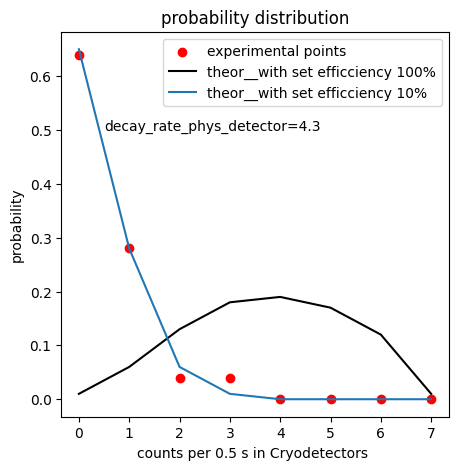

In [ ]:
from matplotlib.axis import XAxis
fig, ax = plt.subplots(figsize=(5, 5))
number=np.arange(0, 8)

exper_frequency_events=[0.64,0.28,0.04,0.04,0,0,0,0]
#theor_frequency_events_20_percent=[63,29,6,1,0,0,0,0]
#theor_frequency_events_17_percent=[63,29,6,1,0,0,0,0]
theor_frequency_events_10_percent=[0.65,0.28,0.06,0.01,0,0,0,0]
theor_frequency_events_100_percent=[0.01,0.06,0.13,0.18,0.19,0.17,0.12,0.01]
#theor_frequency_events_25_percent=[51,34,11,3,0,0,0,0]
number=[0,1,2,3,4,5,6,7]
ax.scatter(number,exper_frequency_events,label='experimental points',color='red')
#ax.scatter(number,theor_frequency_events_20_percent,label='theor__with set efficciency 20')
#ax.scatter(number,theor_frequency_events_17_percent,label='theor__with set efficciency 17')
#ax.scatter(number,theor_frequency_events_10_percent,label='theor__with set efficciency 10')
#ax.scatter(number,theor_frequency_events_100_percent,label='theor__with set efficciency 100')
ax.plot(number,theor_frequency_events_100_percent,label='theor__with set efficciency 100%',color='black')
#ax.plot(number,theor_frequency_events_20_percent,label='theor__with set efficciency 20', color='black')
#ax.plot(number,theor_frequency_events_17_percent,label='theor__with set efficciency 17')
ax.plot(number,theor_frequency_events_10_percent,label='theor__with set efficciency 10%')
#ax.plot(number,theor_frequency_events_25_percent,label='theor__with set efficciency 25')
ax.set( xticks=np.arange(0, 8))
#distr_numb=np.arange(0, 8)
ax.set_xlabel('counts per 0.5 s in Cryodetectors ')
ax.set_ylabel('probability')
plt.title('probability distribution')
ax.text(0.5,0.5,'decay_rate_phys_detector=4.3')
ax.legend()
#ax.text((7.5, 1.5, '$\lambda_phys=4.3 '))
plt.savefig('efficiency of transport')


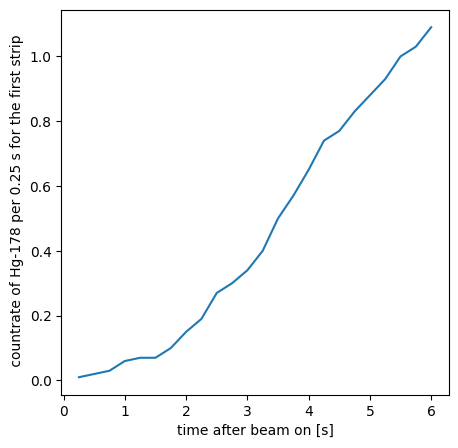

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
time=[0.250,0.500,0.750,1,1.250,1.500,1.750,2,2.250,2.500,2.750,3,3.250,3.500,3.750,4,4.250,4.500,4.750,5,5.250,5.500,5.750,6]
average_counts=[0.01,0.02,0.03,0.06,0.07,0.07,0.1,0.15,0.19,0.27,0.3,0.34,0.4,0.5,0.57,0.65,0.74,0.77,0.83,0.88,0.93,1,1.03,1.09]
change_aver=np.zeros(len(average_counts))
#for i in range(len(average_counts)):
  #if(i>=1):
   #change_aver[i]=(average_counts[i]-average_counts[i-1])/0.25
  #else:
     #change_aver[i]=average_counts[i]/0.25
ax.plot(time,average_counts)
#ax.plot(time,change_aver)
ax.set_xlabel('time after beam on [s]')
ax.set_ylabel(' countrate of Hg-178 per 0.25 s for the first strip')
plt.savefig('transport time spectra of 178Hg')

In [ ]:
change_aver

array([0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.03, 0.05, 0.04, 0.08, 0.03,
       0.04, 0.06, 0.1 , 0.07, 0.08, 0.09, 0.03, 0.06, 0.05, 0.05, 0.07,
       0.03, 0.06])

In [ ]:
change_aver

array([0.04, 0.04, 0.04, 0.12, 0.04, 0.  , 0.12, 0.2 , 0.16, 0.32, 0.12,
       0.16, 0.24, 0.4 , 0.28, 0.32, 0.36, 0.12, 0.24, 0.2 , 0.2 , 0.28,
       0.12, 0.24])

In [ ]:
change_aver=np.zeros(len(average_counts))

In [ ]:
import matplotlib as mpl

**time filters data**

In [ ]:
data_colection={'Time fliter' : coloumn_name, 'Time filter': coloumn name}
data_Hg_178=pd.DataFrame(data_colection)
data_Hg_178.pd.DataFrame.corr(method='pearson')

** Correlation of data** ******

In [ ]:
def covariance(vt1, vt2):

    dvt1 = vt1- vt1.mean()
    dv21 = vt2 - vt2.mean()
    return (dvt1 * dvt2).sum() / (dvt1.count() - 1)

File writing and google disc **connection**

In [ ]:
#connect with personal data in drive storage
from google.colab import drive
drive.mount('/content/drive')

In [45]:
#create excel file
import openpyxl
wbnew = openpyxl.Workbook()
Sheet_1 = wbnew.sheetnames
wbnew.save(filename='57_c.xlsx')
with pd.ExcelWriter('57_c.xlsx',mode='a',engine="openpyxl") as writer:
    mod_Hg178_table_200ms_sampl.to_excel(writer, sheet_name='200ms sampling')
    mod_Hg178_table_400ms.to_excel(writer, sheet_name='400ms sampling')
    mod_Hg178_table_1s.to_excel(writer, sheet_name='1s sampling')


In [ ]:
Fourier_data=strip_zoom.get(['Time','E_a'])

In [78]:
import openpyxl
wbnew = openpyxl.Workbook()
Sheet_1 = wbnew.sheetnames
wbnew.save(filename='5.xlsx')
with pd.ExcelWriter('5.xlsx',mode='a',engine="openpyxl") as writer:
  mod_corr_Hg_178_100ms_time_sampling.to_excel(writer, sheet_name='100ms_sampling')


Statistic with q-q plot

In [ ]:
ab.quantile(5/8)

dat    56.0
Name: 0.625, dtype: float64

In [ ]:
cd=np.random.standard_normal(1000)

array([[<Axes: title={'center': '0'}>]], dtype=object)

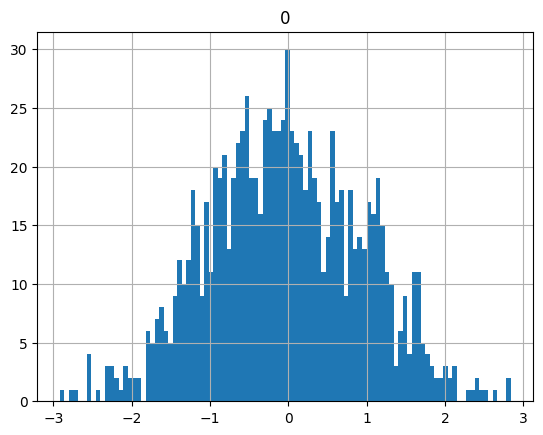

In [ ]:
f=pd.DataFrame(cd)
f.hist(bins=100)

In [ ]:
f.quantile(0.625)

0    0.304623
Name: 0.625, dtype: float64

In [ ]:
np.quantile(f,0.1)

-1.3272663664175932

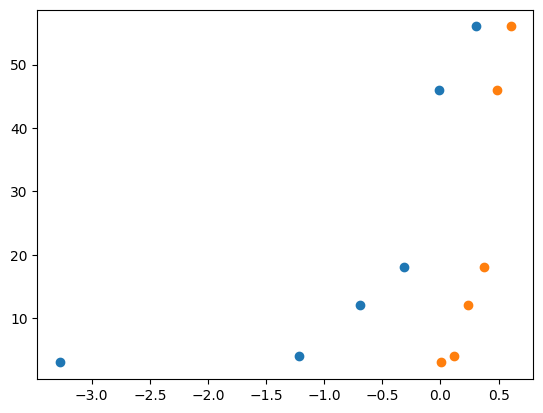

In [ ]:
quant=[-3.2743,-1.215153,-0.692762,-0.317917,-0.011224,0.304623]
values=[3,4,12,18,46,56]
uni=[0.000389,0.114589,0.238099,0.371885,0.486528,0.605086]
plt.scatter(quant,values)
plt.scatter(uni,values)

In [ ]:
un_rand=np.random.uniform(0,1,1000)

array([[<Axes: title={'center': '0'}>]], dtype=object)

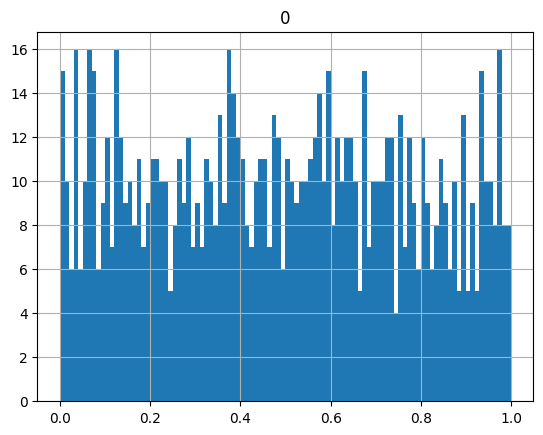

In [ ]:
un_=pd.DataFrame(un_rand)
un_.hist(bins=100)

In [ ]:
un_.quantile(0.625)

0    0.605086
Name: 0.625, dtype: float64

In [ ]:
! pip install pplot


In [ ]:
!pip list

Package                             Version
----------------------------------- ---------------------
absl-py                             1.4.0
aiohttp                             3.8.6
aiosignal                           1.3.1
alabaster                           0.7.13
albumentations                      1.3.1
altair                              4.2.2
anyio                               3.7.1
appdirs                             1.4.4
argon2-cffi                         23.1.0
argon2-cffi-bindings                21.2.0
array-record                        0.5.0
arviz                               0.15.1
astropy                             5.3.4
astunparse                          1.6.3
async-timeout                       4.0.3
atpublic                            4.0
attrs                               23.1.0
audioread                           3.0.1
autograd                            1.6.2
Babel                               2.13.1
backcall                            0.2.0
beautifulsou

In [ ]:
!pip list

Package                             Version
----------------------------------- ---------------------
absl-py                             1.4.0
aiohttp                             3.8.6
aiosignal                           1.3.1
alabaster                           0.7.13
albumentations                      1.3.1
altair                              4.2.2
anyio                               3.7.1
appdirs                             1.4.4
argon2-cffi                         23.1.0
argon2-cffi-bindings                21.2.0
array-record                        0.5.0
arviz                               0.15.1
astropy                             5.3.4
astunparse                          1.6.3
async-timeout                       4.0.3
atpublic                            4.0
attrs                               23.1.0
audioread                           3.0.1
autograd                            1.6.2
Babel                               2.13.1
backcall                            0.2.0
beautifulsou

In [ ]:
import xgboost

In [ ]:
import statsmodels.api as sm

In [ ]:
from numpy.random import gamma
values=[3,4,12,18,46,56]
sns.pplot(values,y=gamma)

NameError: ignored